In [1]:
import stereo as st
import os
import gc
import utils
from importlib import reload
reload(utils)
import pandas as pd
import scanpy as sc
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# check the data
data_path = '../Result/Stereo/One_file/110_integrate.h5ad'
merge_raw = st.io.read_stereo_h5ad(
        file_path=data_path,
        use_raw=True,
        use_result=True,
        )

# read the meta data
meta = pd.read_csv("../Result/Stereo/One_file/110_integrate_meta.csv")
for i in meta.columns:
    merge_raw.cells[i] = meta[i].to_list()
utils.cell_t0_res_key(merge_raw)

In [4]:
merge_raw.tl.cal_qc()

[2024-03-26 13:02:26][Stereo][22879][MainThread][140150468273216][st_pipeline][41][INFO]: start to run cal_qc...
[2024-03-26 13:02:29][Stereo][22879][MainThread][140150468273216][st_pipeline][44][INFO]: cal_qc end, consume time 3.3675s.


In [5]:
annotation_dict = {
    '1':'L1', '2':'WM',
    '3':'L5', '4':'L4',
    '5':'L2/3', '6':'BG1',
    '7':'L6', '8':'BG2',
    '9':'BG3'
    }
merge_raw.tl.annotation(
        annotation_information=annotation_dict,
        cluster_res_key='leiden',
        res_key='annotation'
        )

[2024-03-26 13:02:39][Stereo][22879][MainThread][140150468273216][st_pipeline][41][INFO]: start to run annotation...
[2024-03-26 13:02:45][Stereo][22879][MainThread][140150468273216][st_pipeline][44][INFO]: annotation end, consume time 6.2905s.


In [10]:
merge_raw.cells.to_df()["levels"].value_counts()

control     170465
advanced     58409
moderate     54915
severe       54621
Name: levels, dtype: int64

113324

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

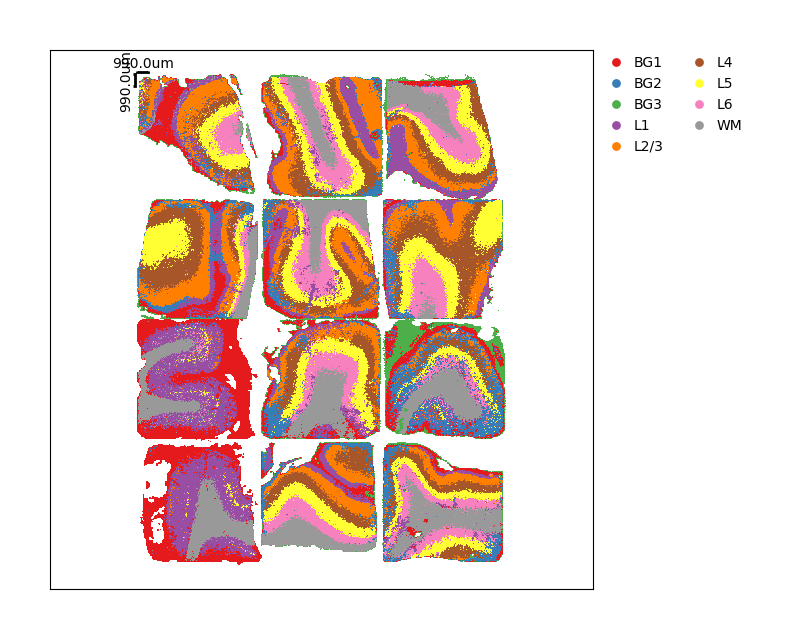

In [5]:
merge.plt.cluster_scatter(res_key = "annotation", reorganize_coordinate=3)

In [6]:
layer_info = merge.tl.result["annotation"].copy()
layer_info = layer_info[~layer_info["group"].isin(["BG1", "BG2", "BG3"])]
merge.tl.filter_cells(cell_list = layer_info["bins"].tolist())
merge.cells["annotation"] = merge.cells["annotation"].cat.remove_categories(['BG1', 'BG2', 'BG3'])

[2024-01-13 15:56:09][Stereo][184923][MainThread][47641848323776][st_pipeline][41][INFO]: start to run filter_cells...
[2024-01-13 15:56:17][Stereo][184923][MainThread][47641848323776][st_pipeline][44][INFO]: filter_cells end, consume time 8.4903s.


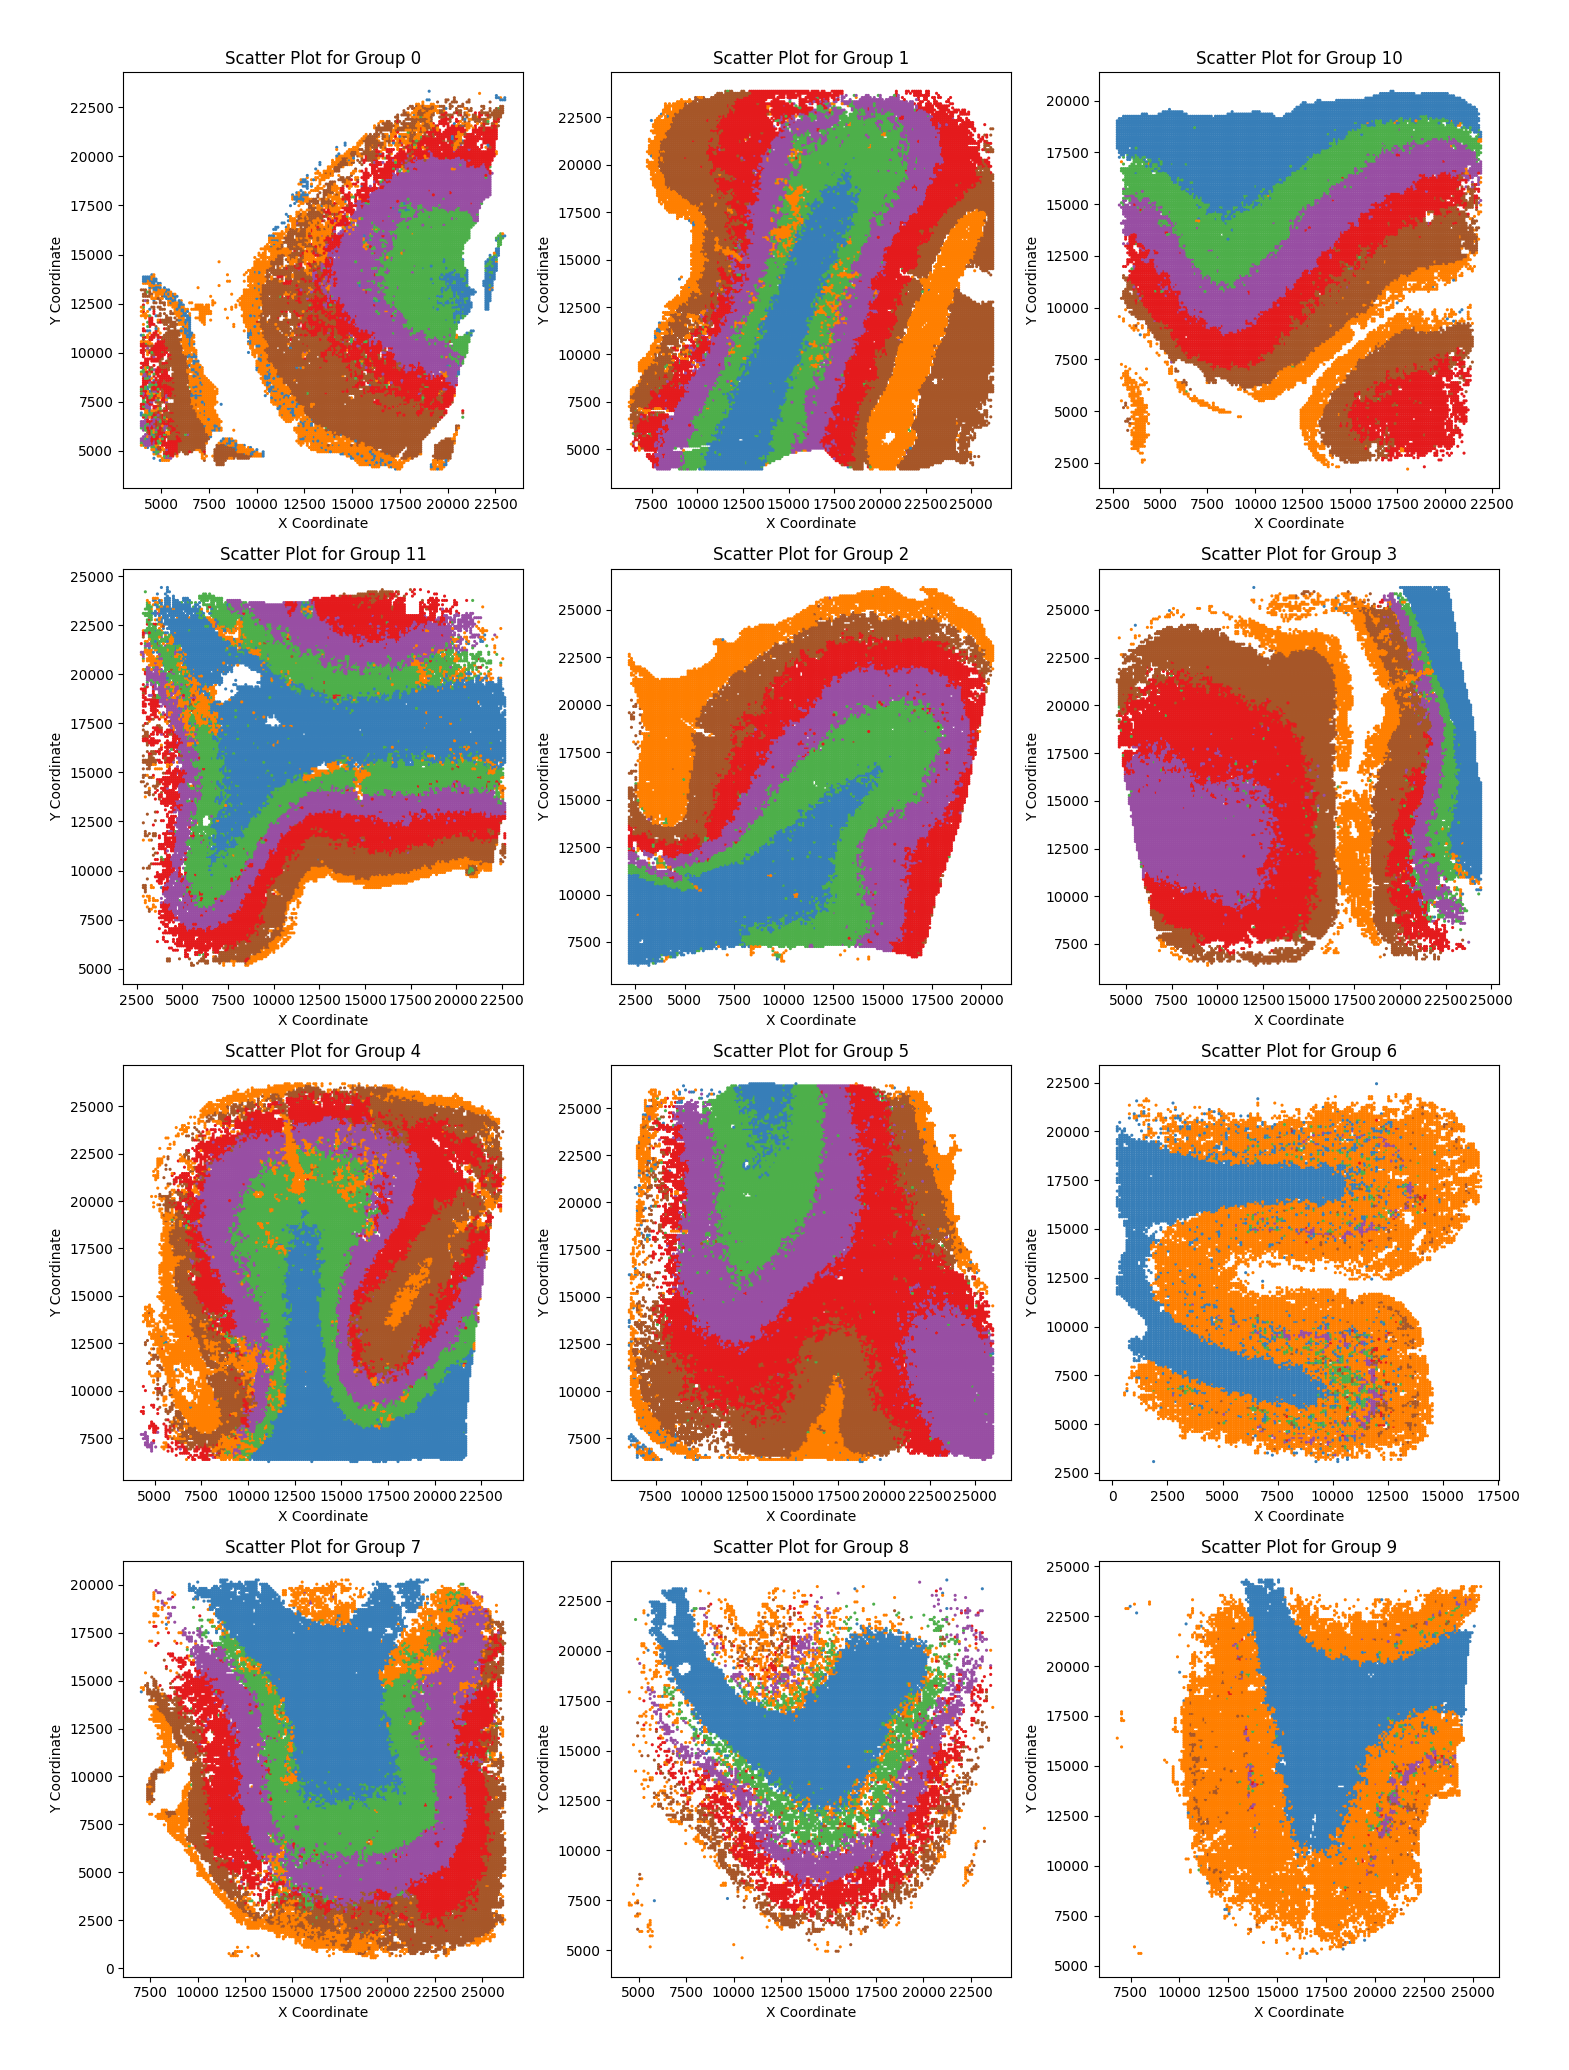

In [7]:
utils.layer_scater_multi(merge, res_key="annotation", dot_size=5)

In [8]:
# get the merge.cells info 
meta = merge.cells.to_df()
perserve_list = meta.index.to_list()

In [10]:
# sort the raw data 
######### read the data as ann h5ad files
control_list = ["B01806B5", "B01806B6", "B01809A3", "B01809A4", "D02175A4", "D02175A6"]
moderate_list = ["B02008D2", "B02009F6"]
advanced_list = ["B01809C2", "C02248B5"]
severe_list = ["A02092E1", "B02008C6"]

###### Control
# import the stereo data
for num,files in enumerate(control_list):
    data_path = "../../processed_data/{}/GeneExpMatrix/{}.tissue.gef".format(files, files)
    data = st.io.read_gef(file_path=data_path, bin_size=110)
    data.cells["diagnosis"] = "control"
    data.cells["levels"] = "control"
    data.cells["sample"] = files
    globals()[files] = data
    
##### moderate
# import the stereo data
for num,files in enumerate(moderate_list):
    data_path = "../../processed_data/{}/GeneExpMatrix/{}.tissue.gef".format(files, files)
    data = st.io.read_gef(file_path=data_path, bin_size=110)
    data.cells["diagnosis"] = "case"
    data.cells["levels"] = "moderate"
    data.cells["sample"] = files
    globals()[files] = data

#### advanced
for num,files in enumerate(advanced_list):
    data_path = "../../processed_data/{}/GeneExpMatrix/{}.tissue.gef".format(files, files)
    data = st.io.read_gef(file_path=data_path, bin_size=110)
    data.cells["diagnosis"] = "case"
    data.cells["levels"] = "advanced"
    data.cells["sample"] = files
    globals()[files] = data

#### severe_list
for num,files in enumerate(severe_list):
    data_path = "../../processed_data/{}/GeneExpMatrix/{}.tissue.gef".format(files, files)
    data = st.io.read_gef(file_path=data_path, bin_size=110)
    data.cells["diagnosis"] = "case"
    data.cells["levels"] = "severe"
    data.cells["sample"] = files
    globals()[files] = data

merge_raw = st.utils.data_helper.merge(B01806B5, B01806B6, B01809A3, B01809A4, D02175A4, D02175A6,
                                  A02092E1, B02009F6, C02248B5, B02008C6, B02008D2, B01809C2)

merge_raw.tl.filter_cells(cell_list = perserve_list)

# read the meta_data
for i in meta.columns:
    merge_raw.cells[i] = meta[i].to_list()

merge_raw.tl.raw_checkpoint()

[2024-02-19 15:36:54][Stereo][61574][MainThread][47066552131264][reader][1042][INFO]: read_gef begin ...
[2024-02-19 15:37:07][Stereo][61574][MainThread][47066552131264][reader][1129][INFO]: the matrix has 21182 cells, and 41578 genes.
[2024-02-19 15:37:09][Stereo][61574][MainThread][47066552131264][reader][1137][INFO]: read_gef end.
[2024-02-19 15:37:09][Stereo][61574][MainThread][47066552131264][reader][1042][INFO]: read_gef begin ...
[2024-02-19 15:37:27][Stereo][61574][MainThread][47066552131264][reader][1129][INFO]: the matrix has 31192 cells, and 43983 genes.
[2024-02-19 15:37:30][Stereo][61574][MainThread][47066552131264][reader][1137][INFO]: read_gef end.
[2024-02-19 15:37:30][Stereo][61574][MainThread][47066552131264][reader][1042][INFO]: read_gef begin ...
[2024-02-19 15:37:50][Stereo][61574][MainThread][47066552131264][reader][1129][INFO]: the matrix has 26055 cells, and 42301 genes.
[2024-02-19 15:37:53][Stereo][61574][MainThread][47066552131264][reader][1137][INFO]: read_g

NameError: name 'perserve_list' is not defined

In [ ]:
# set the normalized data into merge_raw data
#merge_raw.exp_matrix = merge.exp_matrix
#raw_expression = merge.raw.to_df()
#raw_expression.to_csv("../Result/Stereo/Annotation/One_file/raw_exp_matrix.csv")

In [10]:
# save the data
# extract the sample and saved as csv
sample_list = merge_raw.cells.to_df()
pd.DataFrame(sample_list).to_csv("../Result/Stereo/Annotation/One_file/integrate_raw_anno_meta.csv")
st.io.write_h5ad(
        merge_raw,
        use_raw=True,
        use_result=True,
        output='../Result/Stereo/Annotation/One_file/integrate_raw_anno.h5ad',
        split_batches = False
        )
# save to R
st.io.stereo_to_anndata(data,flavor='seurat',output='../Result/Stereo/Annotation/One_file/seurat_out.h5ad')

[2024-01-13 16:00:28][Stereo][184923][MainThread][47641848323776][data][73][WARNING]: the output file is exists, we will replace it with new file.
[2024-01-13 16:00:42][Stereo][184923][MainThread][47641848323776][reader][800][INFO]: Adding sample in adata.obs['orig.ident'].
[2024-01-13 16:00:43][Stereo][184923][MainThread][47641848323776][reader][803][INFO]: Adding data.position as adata.obsm['spatial'] .
[2024-01-13 16:00:43][Stereo][184923][MainThread][47641848323776][reader][808][INFO]: Adding data.position as adata.obs['x'] and adata.obs['y'] .
[2024-01-13 16:00:43][Stereo][184923][MainThread][47641848323776][reader][937][INFO]: Rename QC info.
[2024-01-13 16:00:43][Stereo][184923][MainThread][47641848323776][reader][941][INFO]: Finished conversion to anndata.
... storing 'diagnosis' as categorical
... storing 'levels' as categorical
... storing 'sample' as categorical
[2024-01-13 16:00:43][Stereo][184923][MainThread][47641848323776][reader][945][INFO]: Finished output to ../Result

AnnData object with n_obs × n_vars = 25259 × 42078
    obs: 'diagnosis', 'levels', 'sample', 'batch', 'orig.ident', 'x', 'y'
    uns: 'sn'
    obsm: 'spatial'

In [ ]:
cell_name = sample_list[sample_list.isin(["A02092E1"])].index.tolist()
merge_split.tl.filter_cells(cell_list = cell_name)

In [40]:
# save the data
# extract the sample and saved as csv
sample_list = merge.cells["sample"]
pd.DataFrame(sample_list).to_csv("../Result/Stereo/Annotation/One_file/sample_info.csv")
st.io.write_h5ad(
        merge,
        use_raw=True,
        use_result=True,
        output='../Result/Stereo/Annotation/One_file/integrate_anno.h5ad',
        split_batches = False
        )

[2024-01-11 14:28:18][Stereo][63449][MainThread][47189273272000][data][73][WARNING]: the output file is exists, we will replace it with new file.


In [2]:
# read the data
merge = st.io.read_stereo_h5ad(file_path = "../Result/Stereo/Annotation/One_file/integrate_anno.h5ad")
meta = pd.read_csv("../Result/Stereo/Annotation/One_file/sample_info.csv")
for i in meta.columns:
    merge.cells[i] = meta[i].to_list()

utils.cell_t0_res_key(merge)

In [38]:
#B01809A3
B01809A3 = merge.tl.filter_by_clusters(
    cluster_res_key = "sample", 
    groups = "B01809A3"
)

# select the gene
B01809A3

[2024-02-19 12:24:01][Stereo][31220][MainThread][47035646762688][st_pipeline][41][INFO]: start to run filter_by_clusters...
/work/ygong/conda-envs/st/lib/python3.8/site-packages/stereopy-1.0.0-py3.8.egg/stereo/preprocess/filter.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_res['group'] = cluster_res['group'].to_numpy()
/work/ygong/conda-envs/st/lib/python3.8/site-packages/stereopy-1.0.0-py3.8.egg/stereo/preprocess/filter.py:183: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_res['grou

StereoExpData object with n_cells X n_genes = 23573 X 34208
bin_type: bins
bin_size: 110
offset_x = None
offset_y = None
cells: ['cell_name', 'total_counts', 'pct_counts_mt', 'n_genes_by_counts', 'leiden', 'annotation', 'Unnamed: 0.1', 'Unnamed: 0', 'diagnosis', 'levels', 'sample', 'batch', 'x', 'y', 'spatial_leiden']
genes: ['gene_name', 'n_cells', 'n_counts']
cells_matrix = ['pca', 'pca_integrated', 'umap']
cells_pairwise = ['neighbors', 'spatial_neighbors']
key_record: {'pca': ['pca', 'pca_integrated'], 'neighbors': ['neighbors', 'spatial_neighbors'], 'umap': ['umap'], 'cluster': ['leiden', 'annotation'], 'gene_exp_cluster': ['gene_exp_leiden', 'gene_exp_annotation']}
result: ['pca', 'pca_integrated', 'neighbors', 'spatial_neighbors', 'umap', 'leiden', 'annotation', 'gene_exp_leiden', 'gene_exp_annotation']

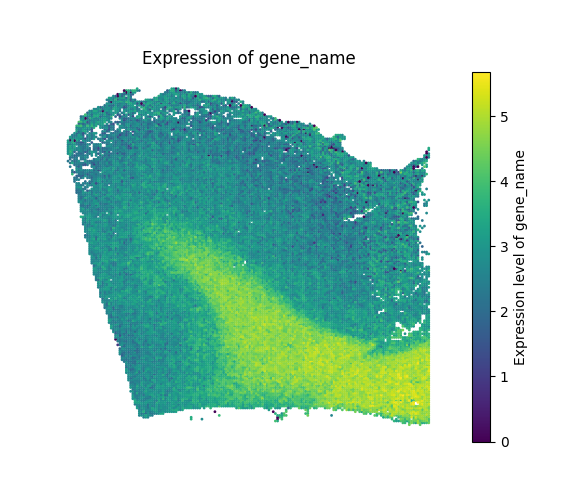

In [64]:
utils.scatter_gene(B01809A3, "MBP", stereo= "TRUE")
plt.axis('off')
plt.savefig('../Result/Figures/Layers/B01809A3_MBP.png', dpi=300)

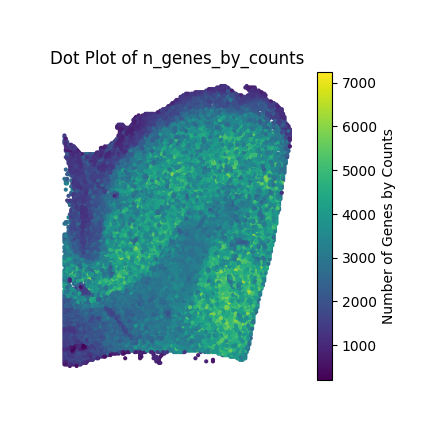

In [63]:
# plot the n_genes_by_counts
df = B01809A3.cells.to_df()
plt.figure(figsize=(4, 4))
scatter = plt.scatter(df["x"], df["y"], c=df["n_genes_by_counts"], cmap="viridis")
plt.title("Dot Plot of n_genes_by_counts")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.colorbar(scatter, label="Number of Genes by Counts")
plt.axis('off')
plt.savefig('../Result/Figures/Layers/B01809A3_n_genes_counts.png', dpi=300)

[2024-02-19 14:42:30][Stereo][58415][MainThread][47225755901632][st_pipeline][41][INFO]: start to run filter_by_clusters...
/work/ygong/conda-envs/st/lib/python3.8/site-packages/stereopy-1.0.0-py3.8.egg/stereo/preprocess/filter.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_res['group'] = cluster_res['group'].to_numpy()
/work/ygong/conda-envs/st/lib/python3.8/site-packages/stereopy-1.0.0-py3.8.egg/stereo/preprocess/filter.py:183: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_res['grou

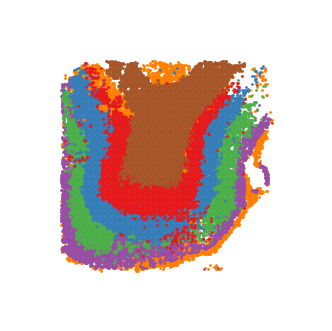

In [4]:
# B02009F6
B02009F6 = merge.tl.filter_by_clusters(
    cluster_res_key = "sample", 
    groups = "B02009F6"
)
utils.scatter_layer(B02009F6, dot_size=4)
plt.savefig('../Result/Figures/Layers/B02009F6_layers.png', dpi=300)

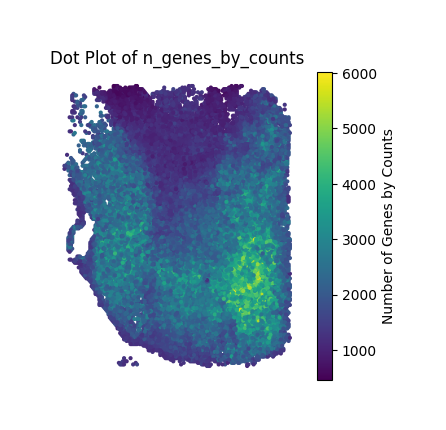

In [5]:
# plot the n_genes_by_counts
df = B02009F6.cells.to_df()
plt.figure(figsize=(4, 4))
scatter = plt.scatter(df["x"], df["y"], c=df["n_genes_by_counts"], cmap="viridis")
plt.title("Dot Plot of n_genes_by_counts")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.colorbar(scatter, label="Number of Genes by Counts")
plt.axis('off')
plt.savefig('../Result/Figures/Layers/B02009F6_n_genes_counts.png', dpi=300)

[2024-02-19 15:00:42][Stereo][61574][MainThread][47066552131264][st_pipeline][41][INFO]: start to run filter_by_clusters...
/work/ygong/conda-envs/st/lib/python3.8/site-packages/stereopy-1.0.0-py3.8.egg/stereo/preprocess/filter.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_res['group'] = cluster_res['group'].to_numpy()
/work/ygong/conda-envs/st/lib/python3.8/site-packages/stereopy-1.0.0-py3.8.egg/stereo/preprocess/filter.py:183: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_res['grou

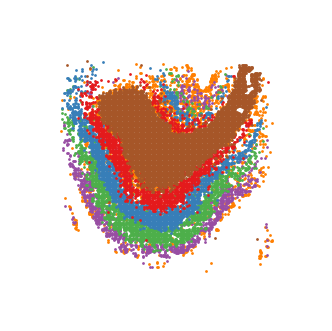

In [3]:
# C02248B5
C02248B5 = merge.tl.filter_by_clusters(
    cluster_res_key = "sample", 
    groups = "C02248B5"
)
utils.scatter_layer(C02248B5, dot_size=4)
plt.savefig('../Result/Figures/Layers/C02248B5_layers.png', dpi=300)

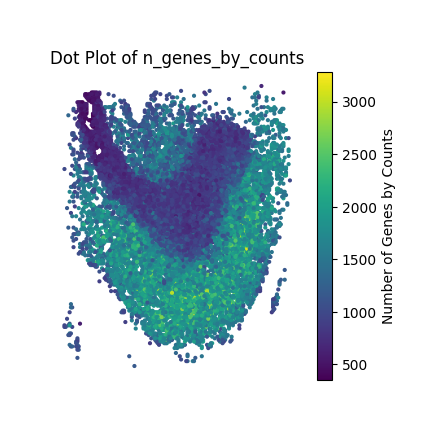

In [5]:
# plot the n_genes_by_counts
df = C02248B5.cells.to_df()
plt.figure(figsize=(4, 4))
scatter = plt.scatter(df["x"], df["y"], c=df["n_genes_by_counts"], cmap="viridis")
plt.title("Dot Plot of n_genes_by_counts")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.colorbar(scatter, label="Number of Genes by Counts")
plt.axis('off')
plt.savefig('../Result/Figures/Layers/C02248B5_n_genes_counts.png', dpi=300)

[2024-02-19 15:15:28][Stereo][61574][MainThread][47066552131264][st_pipeline][41][INFO]: start to run filter_by_clusters...
/work/ygong/conda-envs/st/lib/python3.8/site-packages/stereopy-1.0.0-py3.8.egg/stereo/preprocess/filter.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_res['group'] = cluster_res['group'].to_numpy()
/work/ygong/conda-envs/st/lib/python3.8/site-packages/stereopy-1.0.0-py3.8.egg/stereo/preprocess/filter.py:183: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_res['grou

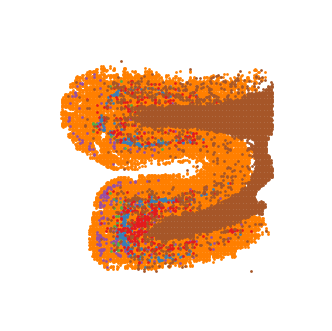

In [6]:
# A02092E1
A02092E1 = merge.tl.filter_by_clusters(
    cluster_res_key = "sample", 
    groups = "A02092E1"
)
utils.scatter_layer(A02092E1, dot_size=4)
plt.savefig('../Result/Figures/Layers/A02092E1_layers.png', dpi=300)

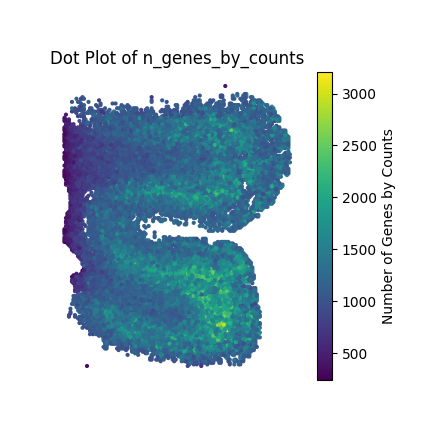

In [7]:
# plot the n_genes_by_counts
df = A02092E1.cells.to_df()
plt.figure(figsize=(4, 4))
scatter = plt.scatter(df["x"], df["y"], c=df["n_genes_by_counts"], cmap="viridis")
plt.title("Dot Plot of n_genes_by_counts")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.colorbar(scatter, label="Number of Genes by Counts")
plt.axis('off')
plt.savefig('../Result/Figures/Layers/A02092E1_n_genes_counts.png', dpi=300)

In [19]:
# plot the heatmap of the gene
# plot the anndata
merge_raw_ann = st.io.stereo_to_anndata(merge_raw,flavor='scanpy', split_batches = False)
merge_raw_ann.obs["barcode"] = merge_raw_ann.obs.index
merge_ann = merge_raw_ann[merge_raw_ann.obs["barcode"].isin(merge.cells.to_df().index.tolist())]
merge_ann.obs = merge.cells.to_df()

[2024-02-19 16:45:38][Stereo][61574][MainThread][47066552131264][reader][800][INFO]: Adding sample in adata.obs['orig.ident'].
[2024-02-19 16:45:38][Stereo][61574][MainThread][47066552131264][reader][803][INFO]: Adding data.position as adata.obsm['spatial'] .
[2024-02-19 16:45:38][Stereo][61574][MainThread][47066552131264][reader][808][INFO]: Adding data.position as adata.obs['x'] and adata.obs['y'] .
[2024-02-19 16:45:38][Stereo][61574][MainThread][47066552131264][reader][858][INFO]: Adding data.tl.result['pca_integrated'] into adata.obsm['X_pca'] .
[2024-02-19 16:45:38][Stereo][61574][MainThread][47066552131264][reader][866][INFO]: Adding data.tl.result['neighbors']['connectivities'] into adata.obsp['connectivities'] .
[2024-02-19 16:45:38][Stereo][61574][MainThread][47066552131264][reader][867][INFO]: Adding data.tl.result['neighbors']['nn_dist'] into adata.obsp['distances'] .
[2024-02-19 16:45:38][Stereo][61574][MainThread][47066552131264][reader][870][INFO]: Adding info into adata

In [49]:
# set the marker genes dic
marker_genes_dict = {
    'L1': ['GFAP'],
    'L2/3': ['HPCAL1'],
    'L4': ['PVALB'],
    'L5': ['PCP4'],
    'L6': ['KRT17'],
    'WM': ['MBP']
}

In [50]:
# use only on six controls
merge_ann_control = merge_ann[merge_ann.obs["levels"] == "control"]

/work/ygong/conda-envs/st/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


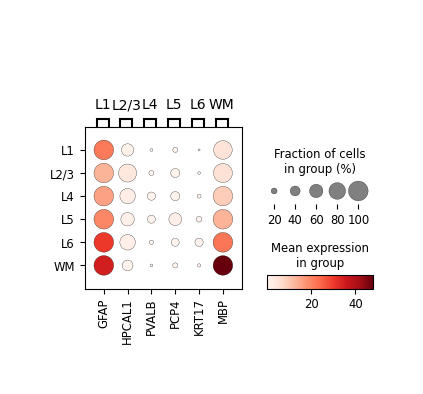

In [51]:
sc.pl.dotplot(merge_ann_control, marker_genes_dict, 'annotation')

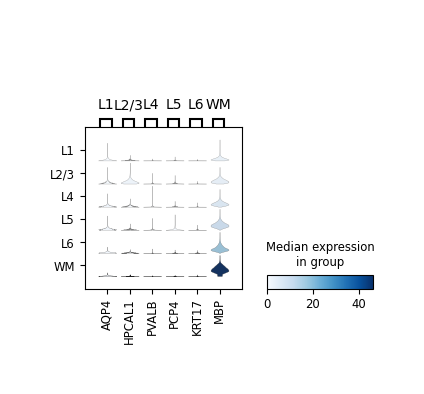

In [32]:
sc.pl.stacked_violin(merge_ann_control, marker_genes_dict, 'annotation')

In [43]:
# layer markers
merge.tl.find_marker_genes(
        cluster_res_key='annotation',
        method='t_test',
        use_highly_genes=False,
        use_raw=True
        )

In [46]:
table = utils.stereo_DE_table(merge, res_key="annotation", gene_num=60)
#utils.VlnPlot(merge, res_key= "annotation", gene = "AQP4")

In [52]:
table[table["genes"] == "GFAP"]

pvalues_adj    log2fc genes       group
14   1.044512e-74  1.938314  GFAP  L1.vs.rest
241  0.000000e+00  9.507782  GFAP  L6.vs.rest
302  0.000000e+00  8.120919  GFAP  WM.vs.rest

In [13]:
# plot the umap
umap_pos = merge_raw.cells_matrix["umap"]
umap_pos["cell_barcode"] = merge_raw.cell_names

umap_pos = umap_pos[umap_pos["cell_barcode"].isin(merge.cell_names)]

umap_pos["annotation"] = merge.cells["annotation"].tolist()
umap_pos.columns = ["x", "y", "cell_barcode", "annotation"]

color = {
    "L6":"#E41A1C", "L5":"#377EB8", "L4":"#4DAF4A", "L2/3":"#984EA3", "L1":"#FF7F00", "WM":"#A65628"
    }
umap_pos['color'] = umap_pos['annotation'].map(color)
umap_pos["sample"] = merge.cells["sample"].tolist()
umap_pos["levels"] = merge.cells["levels"].tolist()

/tmp/ipykernel_61574/3225049794.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umap_pos["annotation"] = merge.cells["annotation"].tolist()
/tmp/ipykernel_61574/3225049794.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umap_pos['color'] = umap_pos['annotation'].map(color)
/tmp/ipykernel_61574/3225049794.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

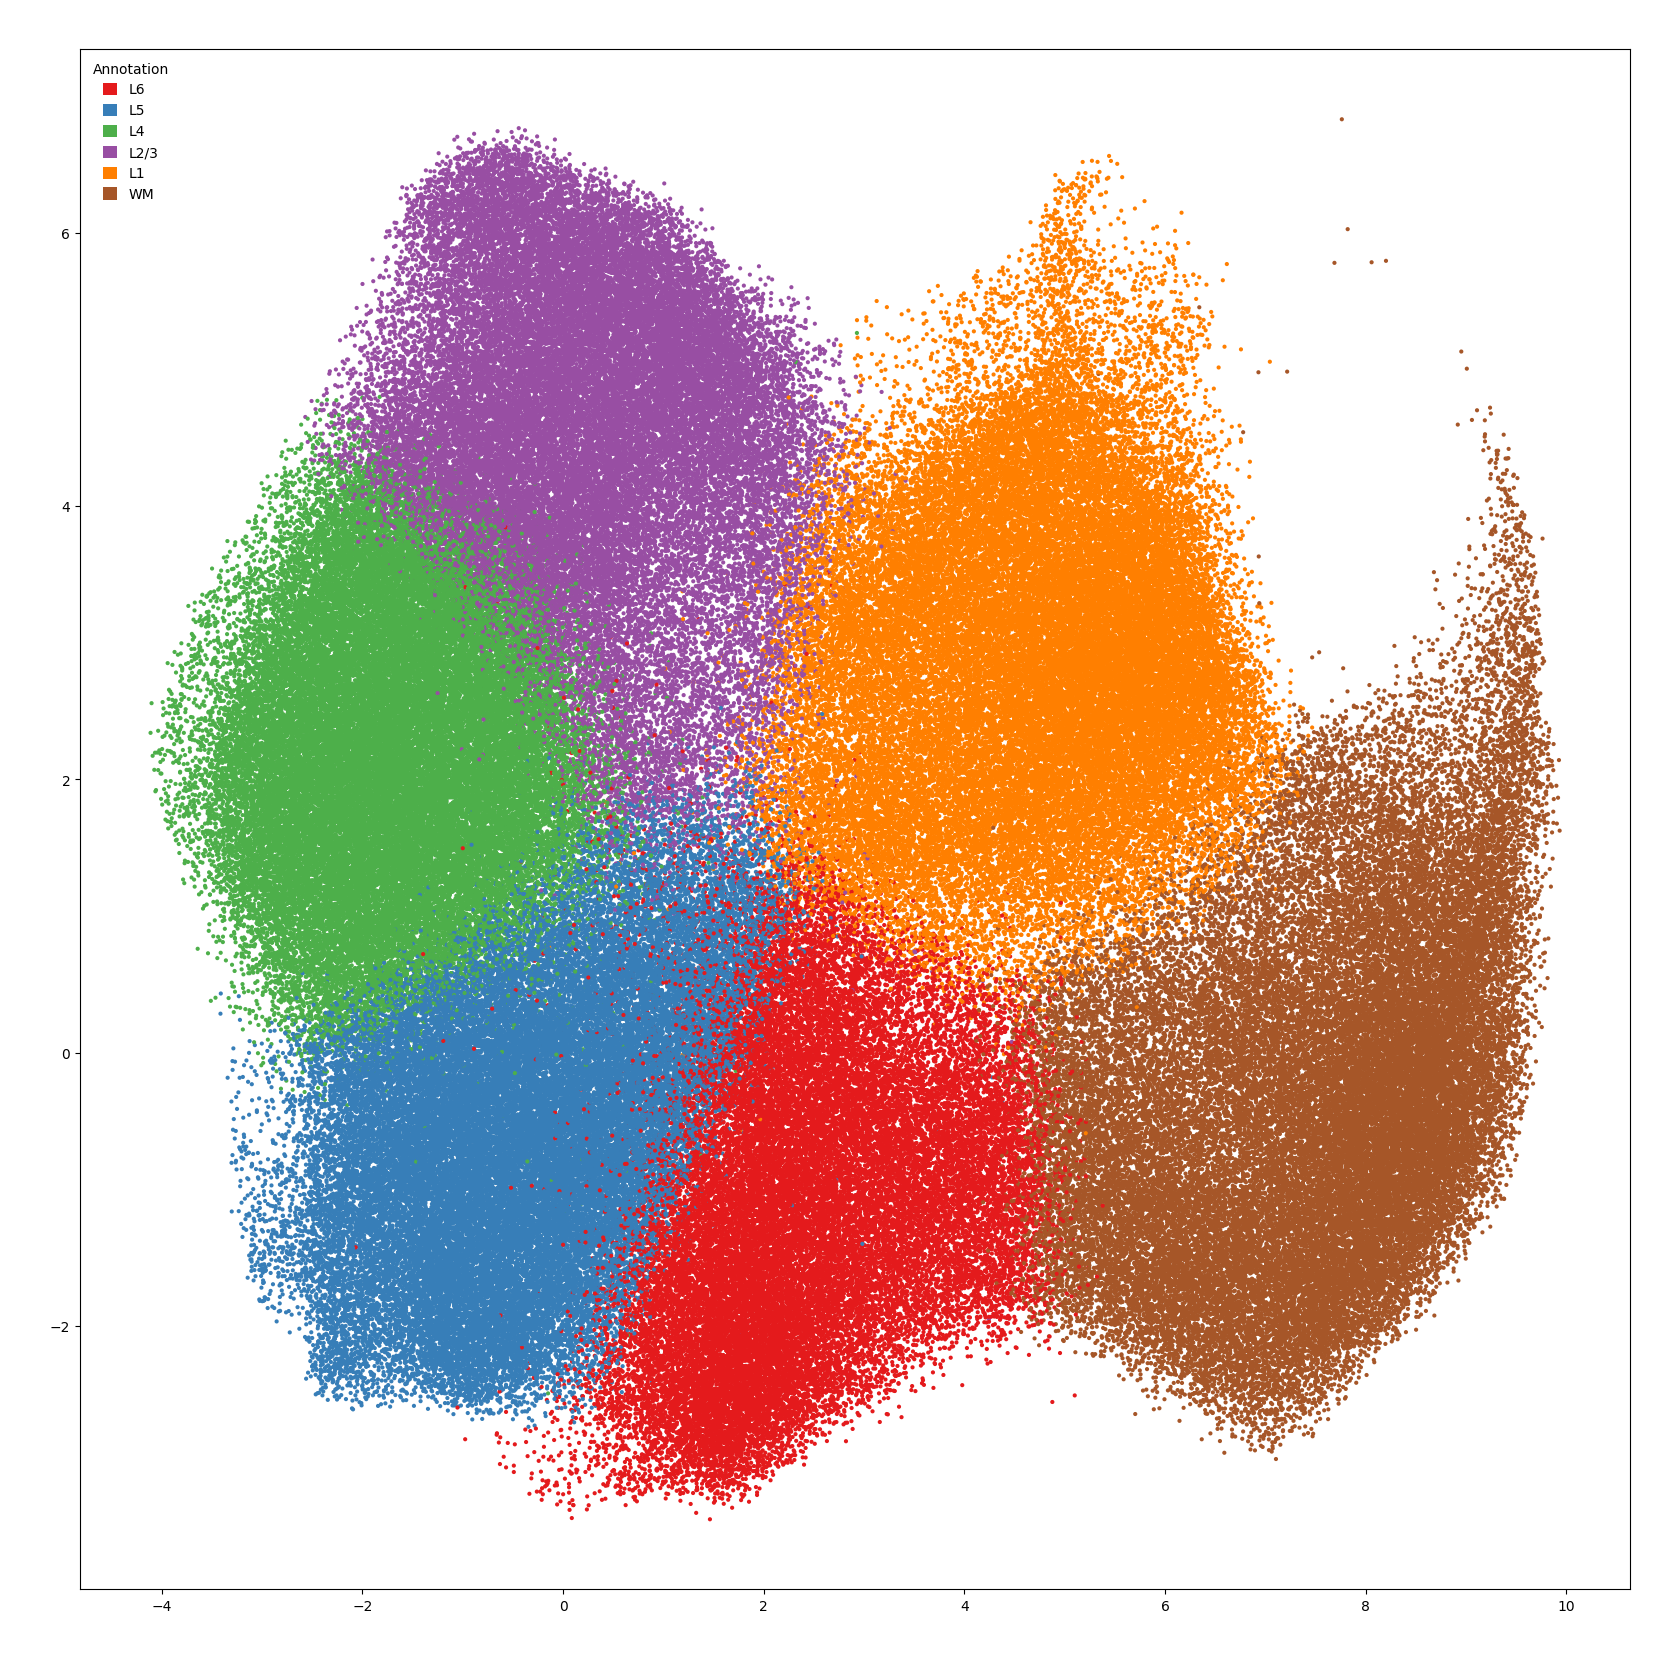

In [17]:
# Plotting based on the layers
plt.figure(figsize=(20, 20))
plt.scatter(umap_pos['x'], umap_pos['y'], c=umap_pos['color'], label=umap_pos['annotation'])
#plt.title('Scatter plot colored by annotation with specific colors')
#plt.xlabel('Column 0')
#plt.ylabel('Column 1')

# Create custom legends
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color[key], edgecolor=color[key], label=key) for key in color]
plt.legend(handles=legend_elements, title='Annotation')
plt.savefig('../Result/Figures/Layers/layers_umap.png', dpi=300)

/tmp/ipykernel_114065/2297218020.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umap_pos['color'] = umap_pos['sample'].map(sample_to_color)


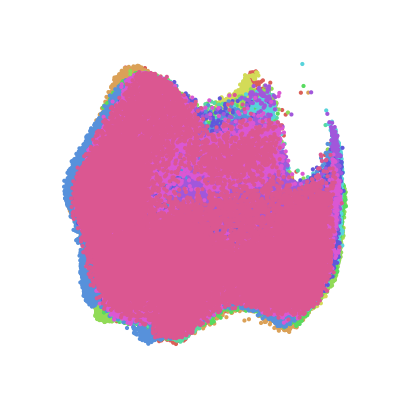

In [37]:
# Generate a list of unique colors for the samples, one for each unique category
palette = sns.color_palette("hls", len(umap_pos['sample'].unique()))

# Create a mapping of sample to color
sample_to_color = dict(zip(umap_pos['sample'].unique(), palette))

# Map the sample names to the color palette
umap_pos['color'] = umap_pos['sample'].map(sample_to_color)

# Now plot using the mapped colors
plt.figure(figsize=(4, 4))
plt.scatter(umap_pos['x'], umap_pos['y'], color=umap_pos['color'], label=umap_pos['sample'])

# Remove the axes
plt.axis('off')

# Create a custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=key,
                              markerfacecolor=val, markersize=10) for key, val in sample_to_color.items()]
#plt.legend(handles=legend_elements, title='Sample')
plt.savefig('../Result/Figures/Layers/samples_umap.png', dpi=300)

/tmp/ipykernel_114065/976162500.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umap_pos['color'] = umap_pos['levels'].map(sample_to_color)


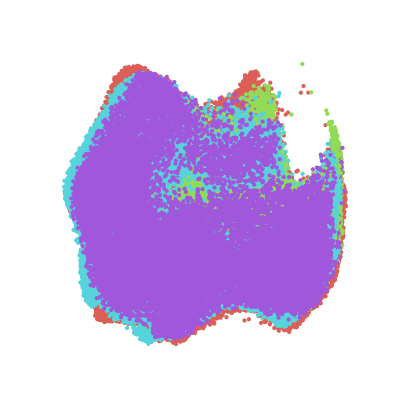

In [43]:
# Generate a list of unique colors for the samples, one for each unique category
palette = sns.color_palette("hls", len(umap_pos['levels'].unique()))

# Create a mapping of sample to color
sample_to_color = dict(zip(umap_pos['levels'].unique(), palette))

# Map the sample names to the color palette
umap_pos['color'] = umap_pos['levels'].map(sample_to_color)

# Now plot using the mapped colors
plt.figure(figsize=(4, 4))
plt.scatter(umap_pos['x'], umap_pos['y'], color=umap_pos['color'], label=umap_pos['levels'])

# Remove the axes
plt.axis('off')

# Create a custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=key,
                              markerfacecolor=val, markersize=10) for key, val in sample_to_color.items()]
#plt.legend(handles=legend_elements, title='Levels')
plt.savefig('../Result/Figures/Layers/level_umap.png', dpi=300)

In [ ]:
utils.VlnPlot(merge, res_key = "levels", gene = "EGR1")

In [48]:
# check the differential expression genes
merge.tl.find_marker_genes(
        cluster_res_key='annotation',
        method='t_test',
        use_highly_genes=False,
        use_raw=True
        )

[2024-02-19 00:43:17][Stereo][114065][MainThread][47874507927232][st_pipeline][41][INFO]: start to run find_marker_genes...
[2024-02-19 00:43:17][Stereo][114065][MainThread][47874507927232][tool_base][122][INFO]: read group information, grouping by group column.
[2024-02-19 00:43:17][Stereo][114065][MainThread][47874507927232][tool_base][151][INFO]: start to run...
[2024-02-19 00:43:17][Stereo][114065][MainThread][47874507927232][time_consume][57][INFO]: start to run calc_pct_and_pct_rest...
[2024-02-19 00:43:35][Stereo][114065][MainThread][47874507927232][time_consume][60][INFO]: calc_pct_and_pct_rest end, consume time 18.3803s.
[2024-02-19 00:43:54][Stereo][114065][MainThread][47874507927232][tool_base][153][INFO]: end to run.
[2024-02-19 00:43:54][Stereo][114065][MainThread][47874507927232][st_pipeline][44][INFO]: find_marker_genes end, consume time 37.5777s.


In [49]:
table = utils.stereo_DE_table(merge, res_key = "levels", gene_num = 10000)

In [50]:
Ex_motif = pd.read_csv("../../Cell_segmentation/Result/WGCNA/Motif/Ex_motif.csv")

In [51]:
Ex_motif = Ex_motif[Ex_motif["fdr"]<0.05]

In [54]:
Ex_motif[Ex_motif["tf"] == "EGR1"]

Unnamed: 0 module    tf      color  odds_ratio           pval  \
675        EGR1    Ex1  EGR1  turquoise    5.621128  1.137643e-106   
1421      EGR11    Ex2  EGR1       blue    5.180896   1.217194e-15   

                fdr Significance   Jaccard  size_intersection  
675   8.082684e-105          ***  0.041373                376  
1421   3.546978e-15          ***  0.006026                 53

In [53]:
# check the overlap of the Ex motfi and the differential expression table
table[table["genes"].isin(Ex_motif["tf"])]

pvalues_adj    log2fc  genes              group
494     0.000000e+00  2.280033   EGR1  control.vs.severe
511     0.000000e+00  2.251927  ARNT2  control.vs.severe
512     0.000000e+00  2.250368   EGR4  control.vs.severe
546     0.000000e+00  2.186626  MEF2C  control.vs.severe
1169    0.000000e+00  1.696525    MAZ  control.vs.severe
...              ...       ...    ...                ...
19370   0.000000e+00  0.922050  CEBPD  control.vs.severe
19496  2.364116e-218  0.917177   RFX5  control.vs.severe
19851   0.000000e+00  0.903679   LHX2  control.vs.severe
19858   0.000000e+00  0.903548   JUNB  control.vs.severe
19974   7.088272e-23  0.899313   VSX1  control.vs.severe

[204 rows x 4 columns]

[2024-02-18 16:55:28][Stereo][67162][MainThread][47035790204608][st_pipeline][41][INFO]: start to run filter_by_clusters...
/work/ygong/conda-envs/st/lib/python3.8/site-packages/stereopy-1.0.0-py3.8.egg/stereo/preprocess/filter.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_res['group'] = cluster_res['group'].to_numpy()
/work/ygong/conda-envs/st/lib/python3.8/site-packages/stereopy-1.0.0-py3.8.egg/stereo/preprocess/filter.py:183: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_res['grou

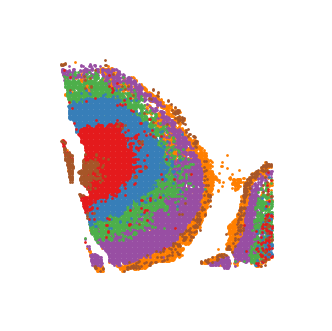

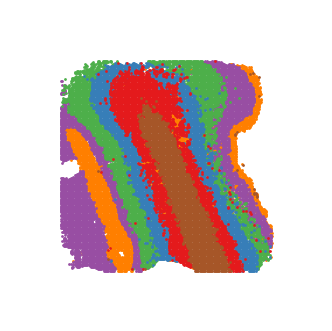

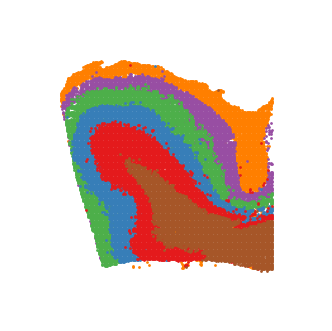

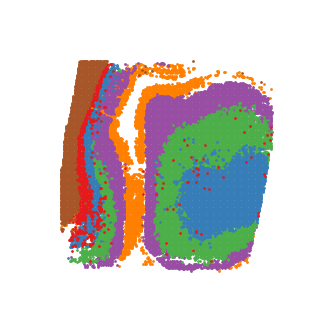

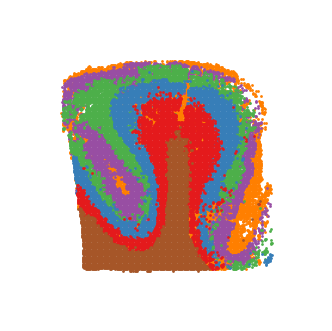

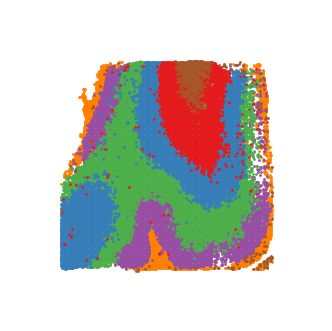

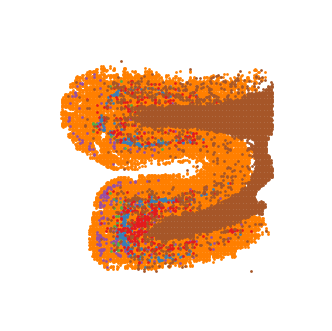

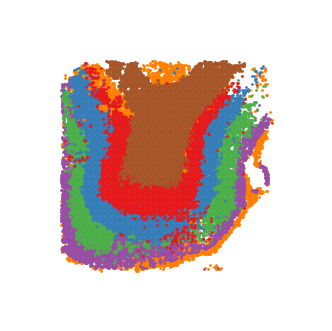

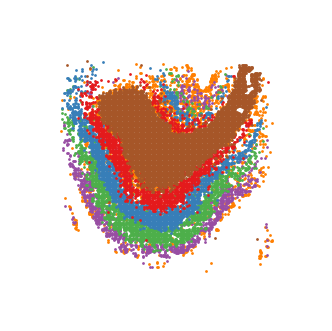

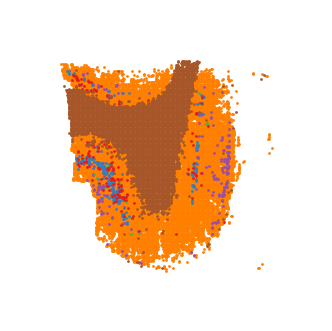

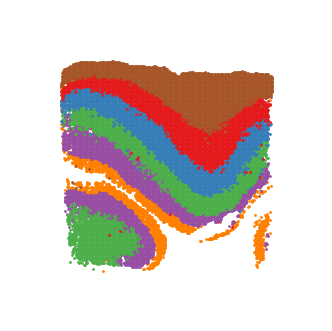

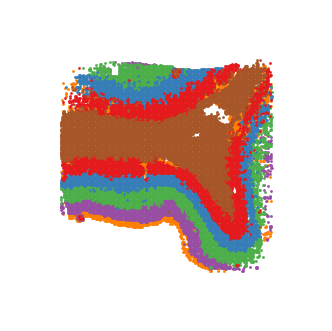

In [26]:
# save the figure
for sample in merge.cells["sample"].unique():
    tmp = merge.tl.filter_by_clusters(cluster_res_key = "sample", groups = sample)
    utils.scatter_layer(tmp, dot_size = 4)
    plt.savefig('../Result/Figures/Layers/{}.png'.format(sample), dpi=300)

ValueError: array length 338410 does not match index length 263869

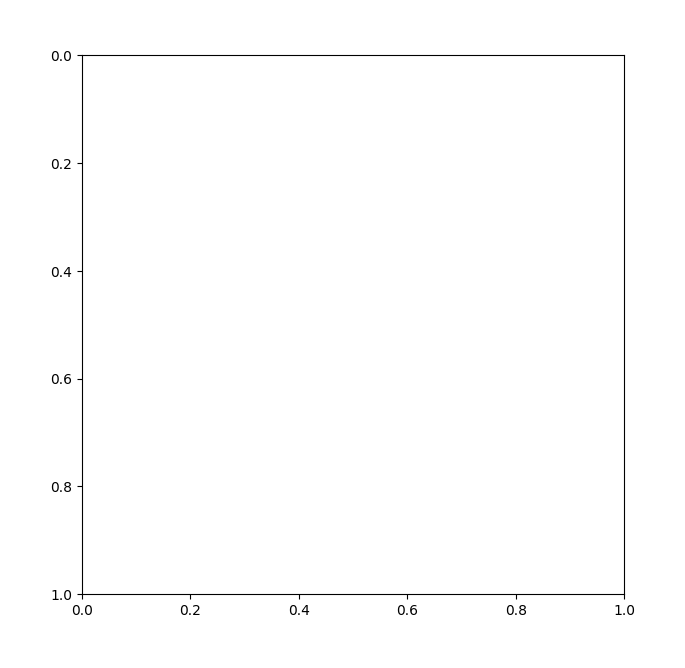

In [7]:
merge.plt.umap(res_key='umap', cluster_key='annotation')

In [47]:
meta_info = merge.cells.to_df()
data = meta_info

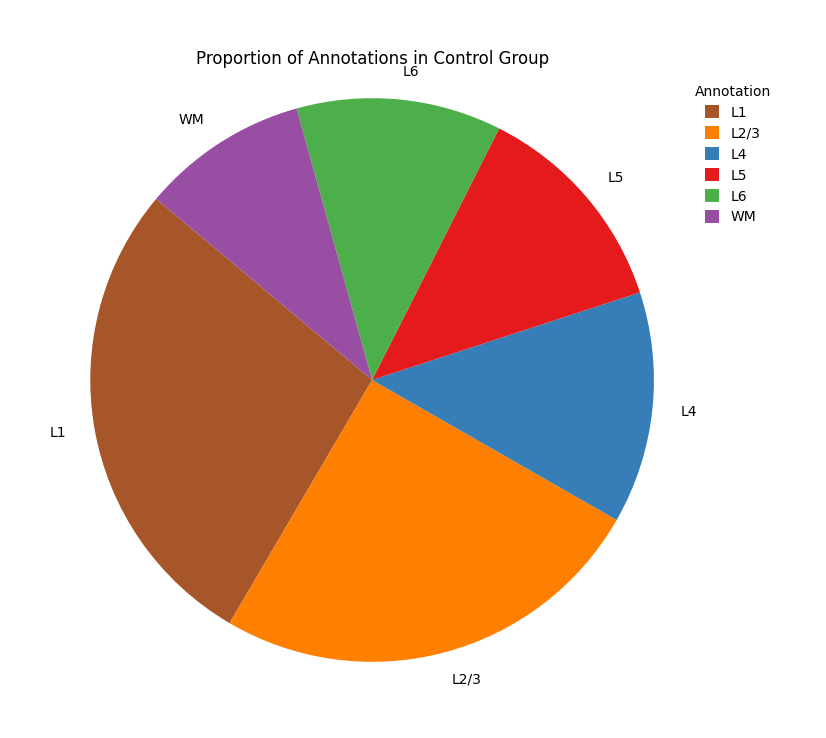

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Filter data for 'control' in the 'diagnosis' column
control_data = data[data['diagnosis'] == 'case']

# Calculate the proportions
annotation_proportions = control_data['annotation'].value_counts(normalize=True)

# Define your color map
color_map = {
    "L6":"#E41A1C", "L5":"#377EB8", "L4":"#4DAF4A", "L2/3":"#984EA3", "L1":"#FF7F00", "WM":"#A65628"
    }
# Get the colors for the annotations present in control_data
colors = [color_map[ann] for ann in annotation_proportions.index if ann in color_map]

# Plotting as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(annotation_proportions, startangle=140, colors=colors, labels = ['L1', 'L2/3', 'L4', 'L5', 'L6', 'WM'])
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Proportion of Annotations in Control Group')
plt.legend(title='Annotation', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

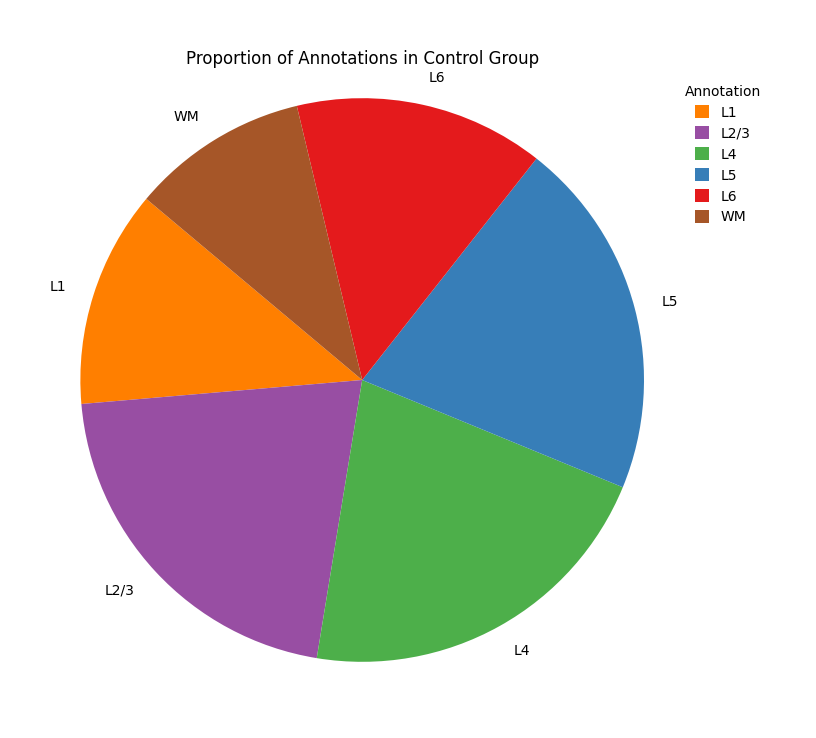

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Filter data for 'control' in the 'diagnosis' column
control_data = data[data['diagnosis'] == 'control']

# Calculate the proportions
annotation_proportions = control_data['annotation'].value_counts(normalize=True)

# Define your color map
color_map = {
    "L1": "#FF7F00", "L2/3": "#984EA3", "L4": "#4DAF4A", 
    "L5": "#377EB8", "L6": "#E41A1C", "WM": "#A65628"
}

# Define the desired label order
desired_order = ["L1", "L2/3", "L4", "L5", "L6", "WM"]

# Sort the proportions and colors according to the desired order
sorted_proportions = [annotation_proportions[label] for label in desired_order if label in annotation_proportions]
sorted_colors = [color_map[label] for label in desired_order if label in annotation_proportions]

# Plotting as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sorted_proportions, startangle=140, colors=sorted_colors, labels=desired_order)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Proportion of Annotations in Control Group')
plt.legend(title='Annotation', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [3]:
from scipy.io import mmwrite
from scipy.sparse import csr_matrix

# convert into R files
integrated_matrix = merge_raw.exp_matrix
raw_matrix = merge_raw.raw.exp_matrix

NameError: name 'merge_raw' is not defined

In [14]:
# save the matrix
integrated_matrix = integrated_matrix.astype('int32')
raw_matrix = raw_matrix.astype('int32')

mmwrite("../Result/R_conversion/integrated_matrix.mtx", integrated_matrix)
mmwrite("../Result/R_conversion/raw_matrix.mtx", raw_matrix)

In [13]:
raw_matrix

<263869x34208 sparse matrix of type '<class 'numpy.uint32'>'
	with 680301984 stored elements in Compressed Sparse Row format>

In [14]:
# save position
position = pd.DataFrame(merge.position)
position.columns = ["x", "y"]
position.to_csv("../Result/R_conversion/location.csv")

In [6]:
# save the cell and gene names
pd.DataFrame(merge.gene_names).to_csv("../Result/R_conversion/gene_names.csv")
pd.DataFrame(merge.cell_names).to_csv("../Result/R_conversion/cell_names.csv")

In [29]:
# save the meta info information
merge.cells.to_df().to_csv("../Result/R_conversion/meta_info.csv")

In [4]:
# read the files for the B01809A3 plot
merge = st.io.read_stereo_h5ad(file_path = "../Result/Stereo/Annotation/Multi_file/integrate_anno-B01809A3.h5ad")

In [16]:
utils.cell_t0_res_key(merge)

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

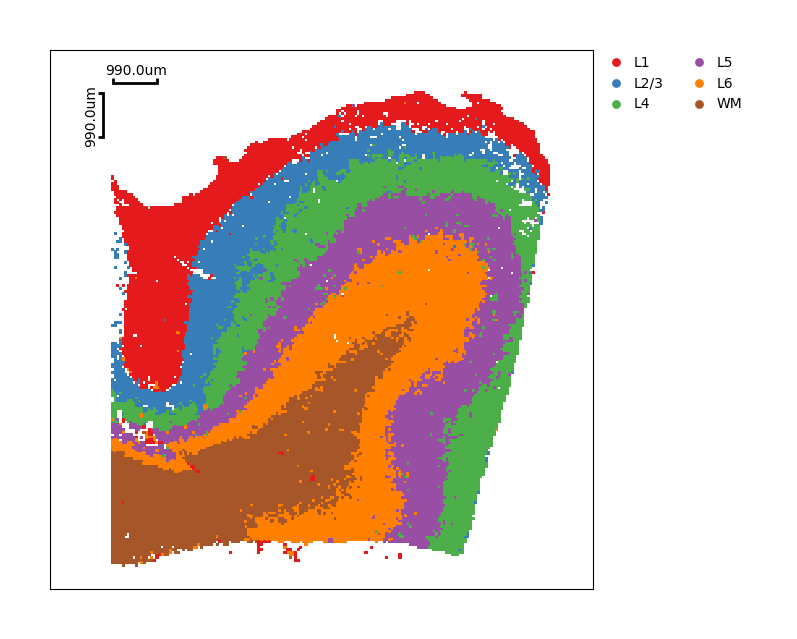

In [20]:
merge.plt.cluster_scatter(res_key='annotation', invert_y=False)

In [22]:
meta = merge.cells.to_df()

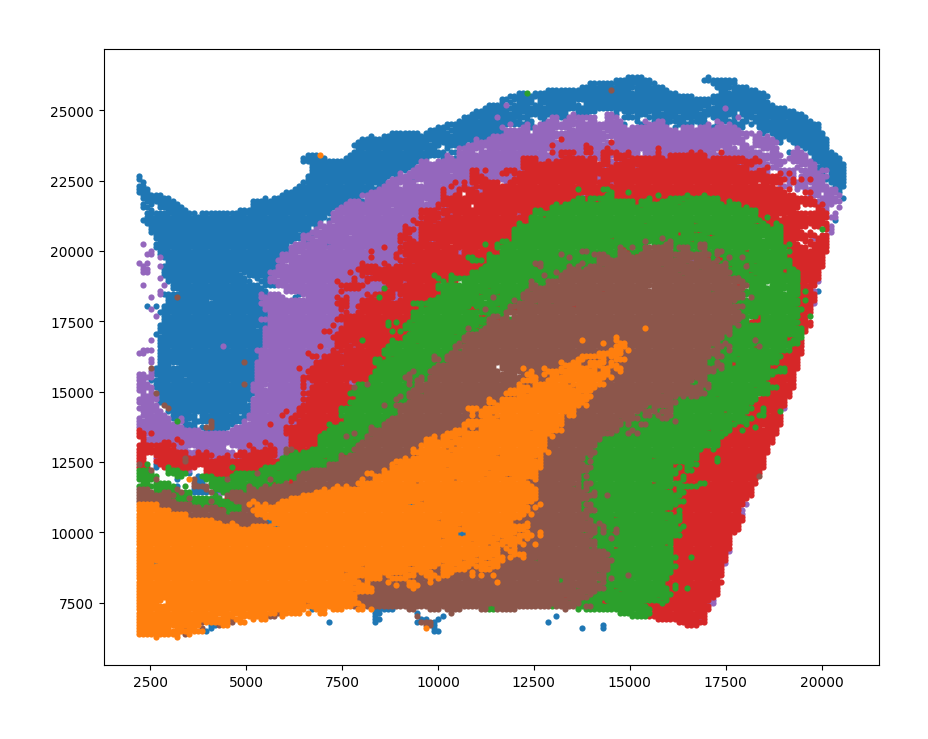

In [28]:
import matplotlib.pyplot as plt

color = {"L1": "#1f77b4", "WM": "#ff7f0e", "L5": "#2ca02c", 
         "L4": "#d62728", "L2/3": "#9467bd", "L6": "#8c564b"}

df = merge.cells.to_df()
plt.figure(figsize=(10, 8))

# Specify the order of layers for plotting
layers_order = ["L1", "L2/3", "L4", "L5", "L6", "WM"]

# Plot each layer in the specified order
for layer in layers_order:
    layer_data = df[df['annotation'] == layer]
    plt.scatter(layer_data['x'], layer_data['y'], c=color[layer], label=layer, s=20)

# Adding labels, title, and legend

# Invert the X-axis
plt.gca()
plt.savefig("../Result/Figures/B01809A3.png", dpi = 300)
# Show the plot
plt.show()


In [5]:
data_path = "../../processed_data/B01809A3/GeneExpMatrix/B01809A3.tissue.gef"
data = st.io.read_gef(file_path=data_path, bin_size=110)

[2024-01-17 10:39:07][Stereo][151567][MainThread][47562602725056][reader][1042][INFO]: read_gef begin ...
[2024-01-17 10:39:27][Stereo][151567][MainThread][47562602725056][reader][1129][INFO]: the matrix has 26055 cells, and 42301 genes.
[2024-01-17 10:39:29][Stereo][151567][MainThread][47562602725056][reader][1137][INFO]: read_gef end.


In [9]:
data.position[:,0]

array([ 2200,  2200,  2200, ..., 11110, 16720,  1760], dtype=uint32)

In [15]:
max(data.position[:,1]) - min(data.position[:,1])

20900

In [23]:
25000/500

50.0